<a href="https://colab.research.google.com/github/albertocj1/CCMACLRL_EXERCISES_COM222/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [494]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay

In [495]:


dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv(dataset_url)

In [496]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [498]:
df = df[['Survived','Embarked', 'Age', 'Sex', 'Pclass', 'SibSp']]
df = pd.get_dummies(df, columns=['Sex', 'Pclass','Embarked'])
df.dropna(inplace=True)
df.head()

,Survived,Age,SibSp,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,False,True,False,False,True,False,False,True
1,1,38.0,1,True,False,True,False,False,True,False,False
2,1,26.0,0,True,False,False,False,True,False,False,True
3,1,35.0,1,True,False,True,False,False,False,False,True
4,0,35.0,0,False,True,False,False,True,False,False,True


In [499]:
correlation = df.corr()
correlation

,Survived,Age,SibSp,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.077221,-0.017358,0.538826,-0.538826,0.301831,0.084753,-0.337587,0.193607,-0.049549,-0.164235
Age,-0.077221,1.000000,-0.308247,-0.093254,0.093254,0.348941,0.006954,-0.312271,0.036261,-0.022405,-0.032523
SibSp,-0.017358,-0.308247,1.000000,0.103950,-0.103950,-0.038962,-0.051647,0.078461,-0.045462,0.051619,0.021751
Sex_female,0.538826,-0.093254,0.103950,1.000000,-1.000000,0.112699,0.073036,-0.161520,0.101580,0.026440,-0.115167
Sex_male,-0.538826,0.093254,-0.103950,-1.000000,1.000000,-0.112699,-0.073036,0.161520,-0.101580,-0.026440,0.115167
Pclass_1,0.301831,0.348941,-0.038962,0.112699,-0.112699,1.000000,-0.335632,-0.590210,0.331867,-0.087032,-0.277938
Pclass_2,0.084753,0.006954,-0.051647,0.073036,-0.073036,-0.335632,1.000000,-0.562330,-0.139748,-0.080567,0.170636
Pclass_3,-0.337587,-0.312271,0.078461,-0.161520,0.161520,-0.590210,-0.562330,1.000000,-0.171566,0.145442,0.097755
Embarked_C,0.193607,0.036261,-0.045462,0.101580,-0.101580,0.331867,-0.139748,-0.171566,1.000000,-0.095320,-0.877931
Embarked_Q,-0.049549,-0.022405,0.051619,0.026440,-0.026440,-0.087032,-0.080567,0.145442,-0.095320,1.000000,-0.375934


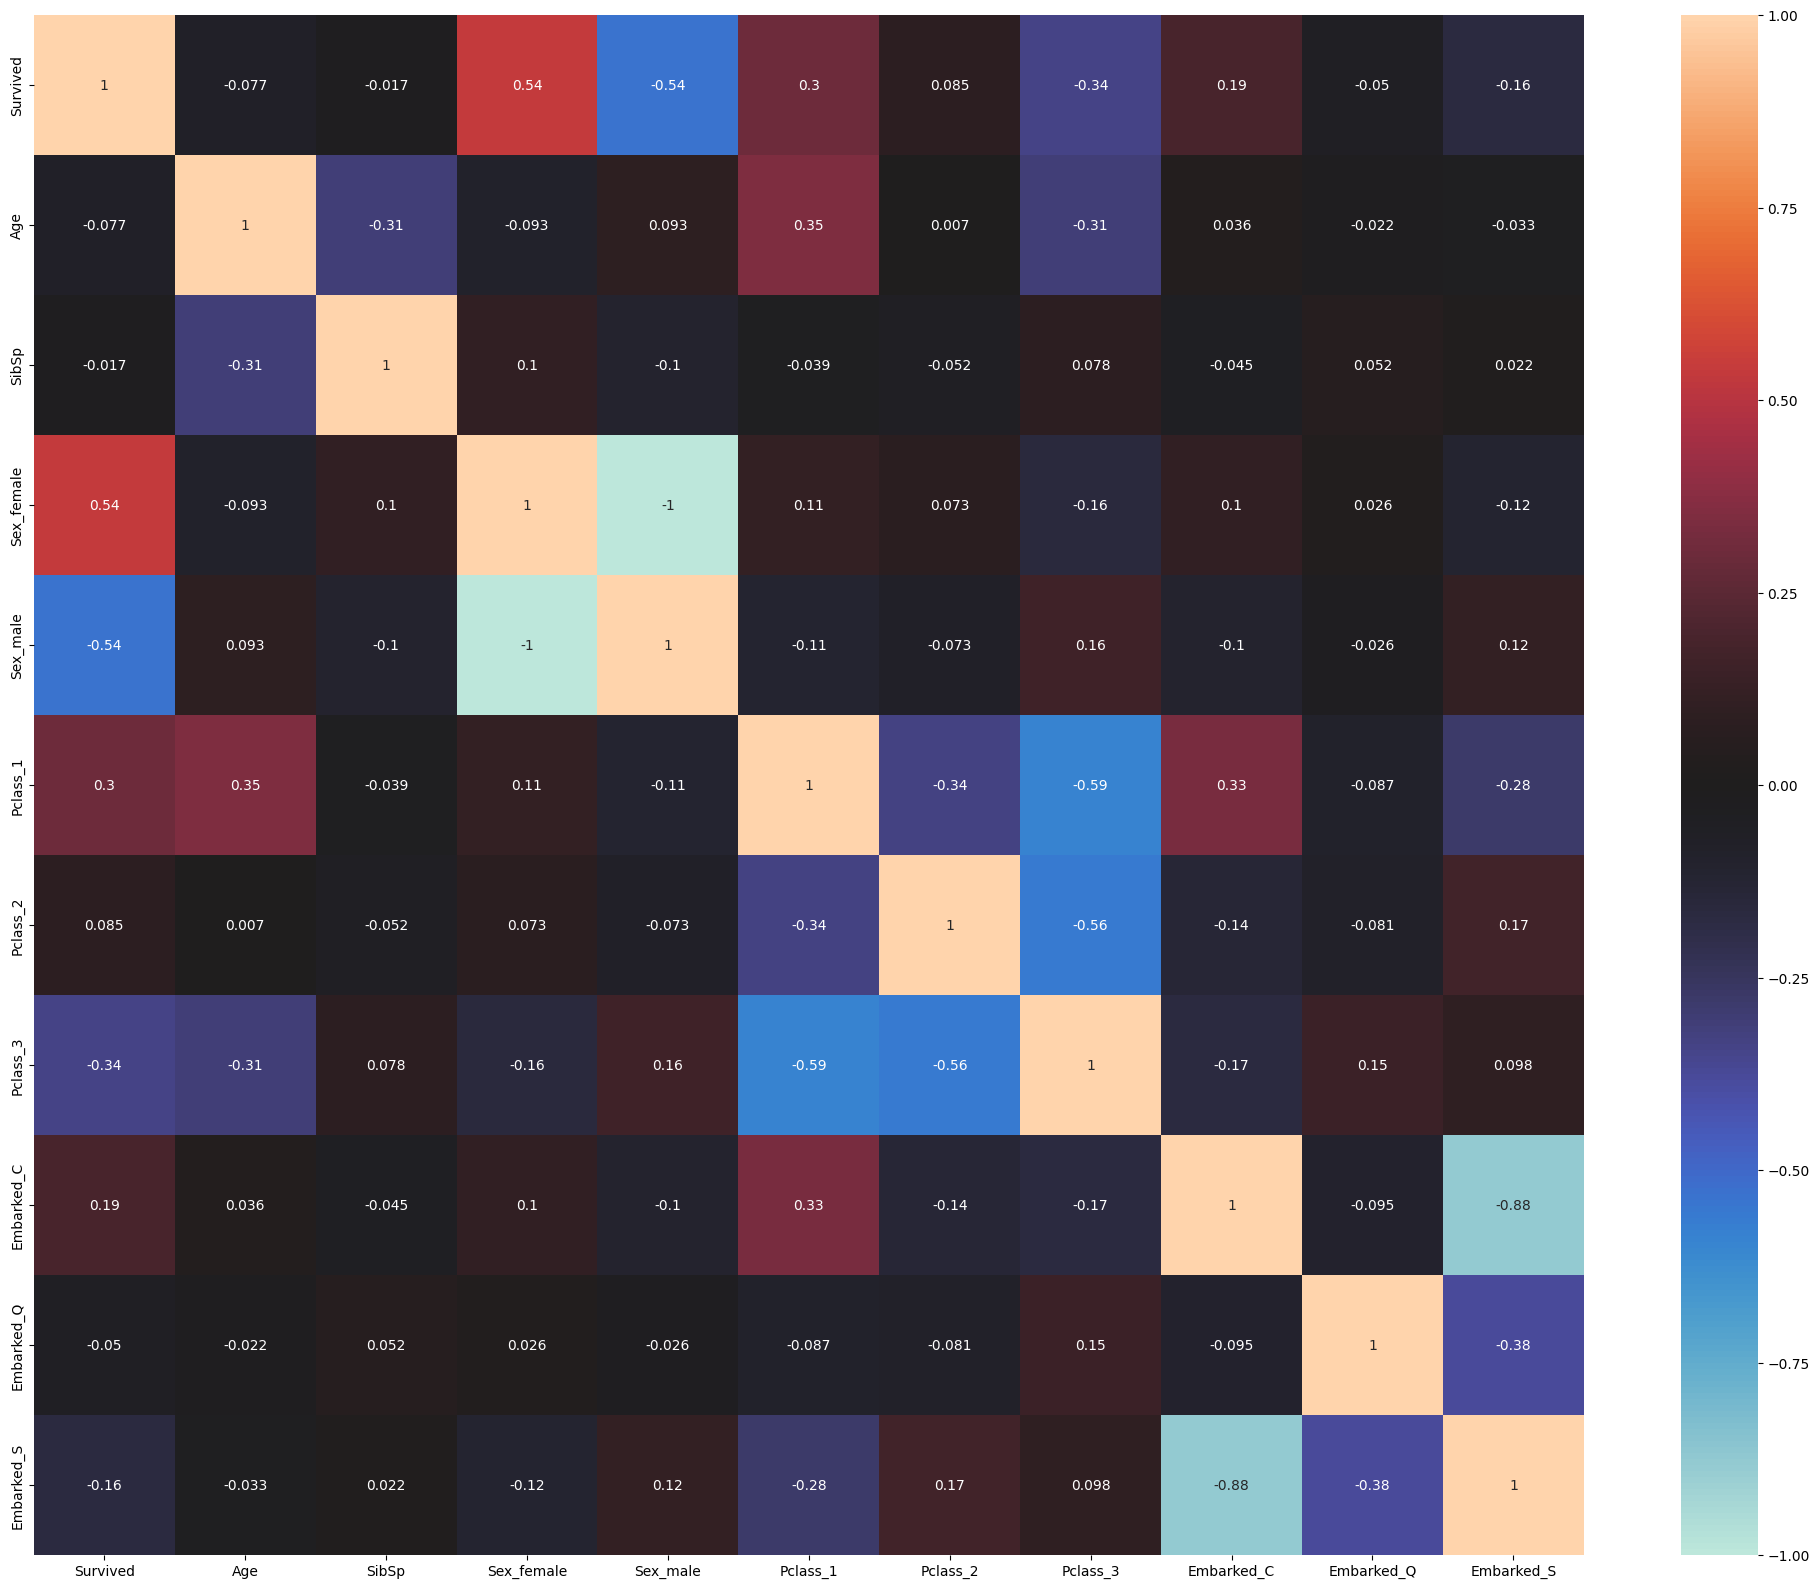

In [500]:

plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [501]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [502]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [503]:
model.score(x_test, y_test)

0.8601398601398601

In [504]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, x, y, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.7941593617649956

In [505]:
from sklearn.metrics import confusion_matrix

y_predicted = model.predict(x_test)
confusion_matrix(y_test, y_predicted)

array([[79,  6],
       [14, 44]])

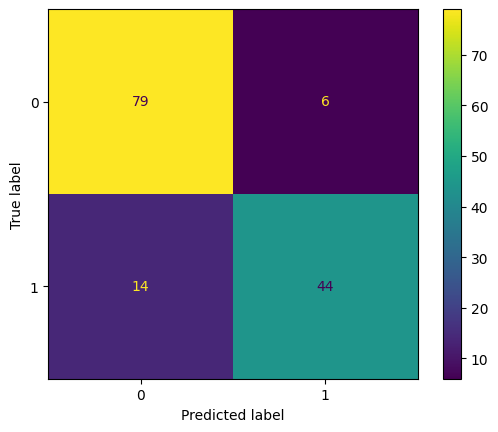

In [506]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

In [507]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        85
           1       0.88      0.76      0.81        58

    accuracy                           0.86       143
   macro avg       0.86      0.84      0.85       143
weighted avg       0.86      0.86      0.86       143



TEST FILE


In [508]:

test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [509]:
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [510]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    714 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       714 non-null    int64  
 3   Sex_female  714 non-null    bool   
 4   Sex_male    714 non-null    bool   
 5   Pclass_1    714 non-null    bool   
 6   Pclass_2    714 non-null    bool   
 7   Pclass_3    714 non-null    bool   
 8   Embarked_C  714 non-null    bool   
 9   Embarked_Q  714 non-null    bool   
 10  Embarked_S  714 non-null    bool   
dtypes: bool(8), float64(1), int64(2)
memory usage: 27.9 KB


In [512]:
dt = dt[['Age', 'Sex', 'Pclass','SibSp', 'Embarked']]
dt = pd.get_dummies(dt, columns=['Sex', 'Pclass','Embarked'])
dt.head()

,Age,SibSp,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,False,True,False,False,True,False,True,False
1,47.0,1,True,False,False,False,True,False,False,True
2,62.0,0,False,True,False,True,False,False,True,False
3,27.0,0,False,True,False,False,True,False,False,True
4,22.0,1,True,False,False,False,True,False,False,True


In [513]:
dt.isnull().sum()

,0
Age,86
SibSp,0
Sex_female,0
Sex_male,0
Pclass_1,0
Pclass_2,0
Pclass_3,0
Embarked_C,0
Embarked_Q,0
Embarked_S,0


In [514]:
dt['Age'].fillna(dt['Age'].median(), inplace=True)

In [515]:

sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [516]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_filets1.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv


In [517]:
dt.shape

(418, 10)